<a href="https://colab.research.google.com/github/leandrorodor/ALR-Machine_Learning_AS/blob/main/regressao_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

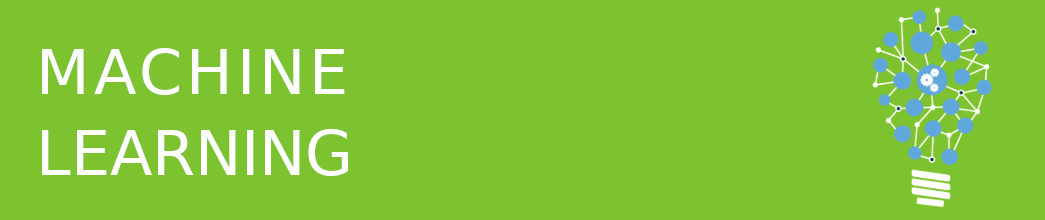

In [1]:
from IPython.display import Image
Image('/content/sample_data/banner_machine_learning.png')

## Entendendo os dados e o problema

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

Download Dataset: [avaliacoes_usuario.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/avaliacoes_usuario.csv)

In [ ]:
movies = pd.read_csv('/content/sample_data/avaliacoes_usuario.csv')

In [ ]:
movies.head(5)

,Titulo,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento,Gostou
0,Nixon (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,114.496547,7.930748,1
1,Leaving Las Vegas (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,110.140191,18.276555,1
2,Persuasion (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,105.747597,16.582232,1
3,Babe (1995),0,0,0,0,0,0,0,0,0,0,1,1,0,126.131978,13.004553,1
4,Carrington (1995),0,0,0,0,1,0,0,0,0,0,0,1,0,85.025469,14.418120,1


In [ ]:
Counter(movies['Gostou'])

Counter({0: 135, 1: 543})

In [ ]:
print('Gostou {}'.format((543/(135+543))))

Gostou 0.8008849557522124


In [ ]:
print('Não gostou {}'.format((135/(135+543))))

Não gostou 0.19911504424778761


In [ ]:
cat = movies[movies.columns[1:16]]
likes = movies[movies.columns[16:]]

In [ ]:
#treino, teste, treino_labels, teste_labels = train_test_split(cat, likes, test_size=0.1)
treino, teste, treino_labels, teste_labels = train_test_split(cat, likes)

In [ ]:
type(treino),len(treino)

(pandas.core.frame.DataFrame, 508)

In [ ]:
Counter(treino_labels['Gostou'])

Counter({0: 95, 1: 413})

In [ ]:
Counter(teste_labels['Gostou'])

Counter({0: 35, 1: 135})

In [ ]:
print('Gostou % {} do treino_label (deve manter a proporção +- 80%)'.format(413/(95+413)))

Gostou % 0.812992125984252 do treino_label (deve manter a proporção +- 80%)


In [ ]:
print('Gostou % {} do teste_label (deve manter a proporção +- 80%)'.format(135/(35+135)))

Gostou % 0.7941176470588235 do teste_label (deve manter a proporção +- 80%)


## Regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [ ]:
type(treino),len(treino)

(pandas.core.frame.DataFrame, 508)

In [ ]:
treino[0:1]

,Documentary,Sci-Fi,Mystery,Horror,Romance,Thriller,Crime,Fantasy,Comedy,Animation,Children,Drama,Adventure,Duracao,Investimento
344,0,0,0,1,0,0,0,0,0,0,0,0,0,131.165837,39.479492


In [ ]:
treino = np.array(treino).reshape(len(treino), 15)
teste = np.array(teste).reshape(len(teste), 15)

In [ ]:
type(treino),len(treino)

(numpy.ndarray, 508)

In [ ]:
treino.shape

(508, 15)

In [ ]:
treino[0]

array([ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        , 92.68674263,  4.87897061])

In [ ]:
type(treino_labels)

pandas.core.frame.DataFrame

In [ ]:
treino_labels.head(5)

,Gostou
344,1
290,1
491,1
253,1
511,1


In [ ]:
treino_labels.values

In [ ]:
treino_labels = treino_labels.values.ravel()
teste_labels = teste_labels.values.ravel()

In [ ]:
type(treino_labels),len(treino_labels),treino_labels,treino_labels.shape,treino_labels[0:5]

(numpy.ndarray,
 508,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1,

In [ ]:
type(teste_labels),len(teste_labels),teste_labels,teste_labels.shape,teste_labels[0:5]

(numpy.ndarray,
 170,
 array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]),
 (170,),
 array([1, 1, 1, 1, 0]))

In [ ]:
modelo_1 = LogisticRegression(max_iter=150)

In [ ]:
modelo_1.fit(treino,treino_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
previsoes_1 = modelo_1.predict(teste)
previsoes_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acuracia_1 = accuracy_score(teste_labels, previsoes_1)
acuracia_1

0.7705882352941177

#### Usando Multinomial Naive Bayes

In [ ]:
modelo_NB = MultinomialNB()

In [ ]:
modelo_NB.fit(treino,treino_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
previsoes_NB = modelo_NB.predict(teste)
previsoes_NB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
acuracia = accuracy_score(teste_labels, previsoes_NB)
acuracia

0.7470588235294118

In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo_NB.predict([zootopia])

array([1])

#### EXTRA: Usando Gaussian Naive Bayes

In [ ]:
modelo_GNB = GaussianNB()

In [ ]:
modelo_GNB.fit(treino,treino_labels)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
previsoes_GNB = modelo_GNB.predict(teste)
previsoes_GNB

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
acuracia = accuracy_score(teste_labels, previsoes_GNB)
acuracia

0.6705882352941176

In [ ]:
zootopia = [0,0,0,0,0,0,0,1,1,1,1,0,1,110,27.74456356]
modelo_GNB.predict([zootopia])

array([1])